In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Зададим начальные условия для трубы

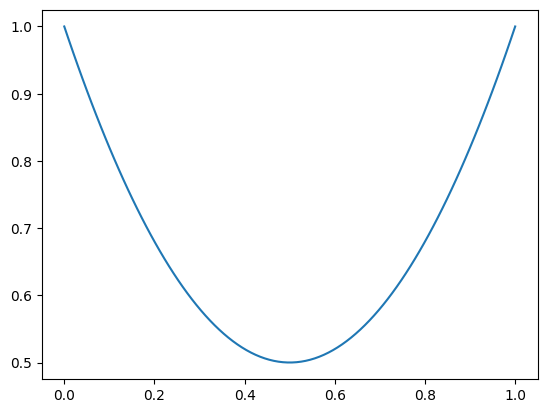

In [19]:
N = 100
A_0 = 0.5
X_0 = 0.5
x = np.linspace(0, 1, N)
A = lambda x: A_0 + (1 - A_0)*(1- x/X_0)**2
plt.plot(x, A(x))

In [20]:

Gam = 1.4
Gm1 = Gam * 1e-4
XL = 1
Dx = XL/N
CFL = 0.8
TOL = 1e-4
Xmin = 0. * XL
Amin = 0.5

In [21]:
# Left and right boundary values
RL = 1
UL = 1.0237498
PL = 8

RR = 0.8835893
UR = 1.1586268
PR = 7.0315580

Gam = 1.4


In [31]:
Q = np.zeros(3*N).reshape(3, N)
F = np.zeros(3*N).reshape(3, N)
QP = np.zeros(3*N).reshape(3, N)

for i in range(0, N):
    C_2 = x[i]
    C_1 = 1 - C_2
    R = C_1 * RL + C_2 * RR
    U = C_1 * UL + C_2 * UR
    P = C_1 * PL+C_2 * PR
    Q[0][i] = R
    Q[1][i] = R * U
    Q[2][i] = P / Gm1 + 0.5 * R * U * U

T = 0
NRec = 0
NStep = 0
Eps = 1


<img src="Lax_task2.png" alt="drawing" width="700"/>

In [39]:
def flux(Q,QP,F):
    F[0][:] = Q[1][:]
    F[1][:] = Q[1][:] * QP[1][:] + QP[2][:]
    F[2][:] = (Q[2][:] + QP[2][:]) * QP[1][:]


def Cons2Prim(Q,QP):
    QP[0][:] = Q[0][:]
    QP[1][:] = Q[1][:]/QP[0][:]
    QP[2][:] = Gm1*(Q[2][:]-0.5*QP[0][:])*QP[1][:]*QP[1][:]


#Time integration
def lux(Qn, QPn,F):
    Eps = 1
    while Eps > TOL:

    #Calculates available time step
        Vmax = 0
        for i in range(0, N):
            C = np.sqrt(Gam * QPn[2][i] / QPn[0][i])
            Vmax = max(Vmax, abs(QPn[1][i]) + C)
        print(Vmax)

        DT = CFL * Dx / Vmax
        DtDx = 0.5 * DT / Dx

    #Predictor step
        Rho = QP[0][:]
        flux(Q,QP,F)

        for i in range(0, N):
            S = 0
            PS = 0.5*(QP[2][i-1]+QP[2][i])
            AS = 0.5*(A[i-1]+A[i])
            dAdx = (A[i]-A[i-1])
            S[1] = S[1]+PS*dAdx
            Qn[:][i] = 0.5*(A[i-1]*Q[:][i-1]+A[i]*Q[:][i])+ DtDx*(A[i-1]*F[:][i-1]-A[i]*F[:][i]+S)
            Qn[:][i] = Qn[:][i]/AS


        Cons2Prim(Qn,QPn)

    #Corrector step
        flux(Qn,QPn,F)
        for i in range(0, N-1):
            S = 0
            PS = 0.5*(QPn[2][i]+QPn[2][i+1])
            A1 = 0.5*(A[i-1]+A[i])
            A2 = 0.5*(A[i]+A[i+1])
            dAdx = 0.5*(A[i+1]-A[i-1])
            S[1] = S[1]+PS*dAdx
            Q[:][i] = 0.5*(A1*Qn[:][i]+A2*Qn[:][i+1]) + DtDx*(A1*F[:][i]-A2*F[:][i+1]+S)
            Qn[:][i] = Qn[:][i]/A[i]



        Eps = np.max(np.abs((QP[0][:]-Rho)/Rho))/DT

lux(Q, QP, F)

0


C:\Users\gerts\AppData\Local\Temp\ipykernel_17360\1092510186.py:21: RuntimeWarning: invalid value encountered in double_scalars
  C = np.sqrt(Gam * QPn[2][i] / QPn[0][i])


ZeroDivisionError: float division by zero

In [30]:
plt.plot(Q)

100 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
